In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import  OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [52]:
# importar el data set
dataset = pd.read_csv('Fish.csv')

#1. Usando Length1, Length2, Length3, Height y Width Predecir Weight
# Indices X -> [2,...,-1] y -> [1]
#2. Usando Species, Length1, Length2, Length3, Height y Width Predecir Weight

#Analizar Specie de pez influye o no a la predicción de peso de pez.

#'null' --> 0    promedio de especie, 
print(f'{" Visualizacion de dataset ":=^55}')
dataset.head()

============== Visualizacion de dataset ===============


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### **Primer punto**

In [53]:
X = dataset.iloc[:, 2:]
y = dataset.iloc[:, 1].values

# No hay datos categoricos 
mms = MinMaxScaler()
X_completo = mms.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_completo,y,test_size=0.1,random_state=0)

In [54]:
modelo = LinearRegression().fit(X_train, y_train)
score_train = modelo.score(X_train, y_train)
score_test = modelo.score(X_test, y_test)
print('Training score = {:7.3f}'.format(score_train))
print('Test score = {:7.3f}'.format(score_test))

Training score =   0.888
Test score =   0.844


### **Segundo punto**

In [55]:
X = dataset.iloc[:, [0, 2,3,4,5]]
y = dataset.iloc[:, 1].values

# determine categorical and numerical features
numerical = X.select_dtypes(include=['int64', 'float64'])
categorical = X.select_dtypes(include=['object', 'bool'])

enc = OneHotEncoder()
mms = MinMaxScaler()
onehotlabels = enc.fit_transform(categorical).toarray()
onehotlabels = onehotlabels[:,1:] 

X = numerical.iloc[:,:].values
X_mm = mms.fit_transform(X)
X_completo = np.concatenate((onehotlabels, X_mm), axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_completo,y,test_size=0.1,random_state=0)

In [70]:
modelo = LinearRegression().fit(X_train, y_train)
score_train = modelo.score(X_train, y_train)
score_test = modelo.score(X_test, y_test)
print(f'Training score = {score_train*100:7.2f}')
print(f'Test score     = {score_test*100:7.2f}')

Training score =   93.49
Test score     =   93.00


<Figure size 300x300 with 0 Axes>

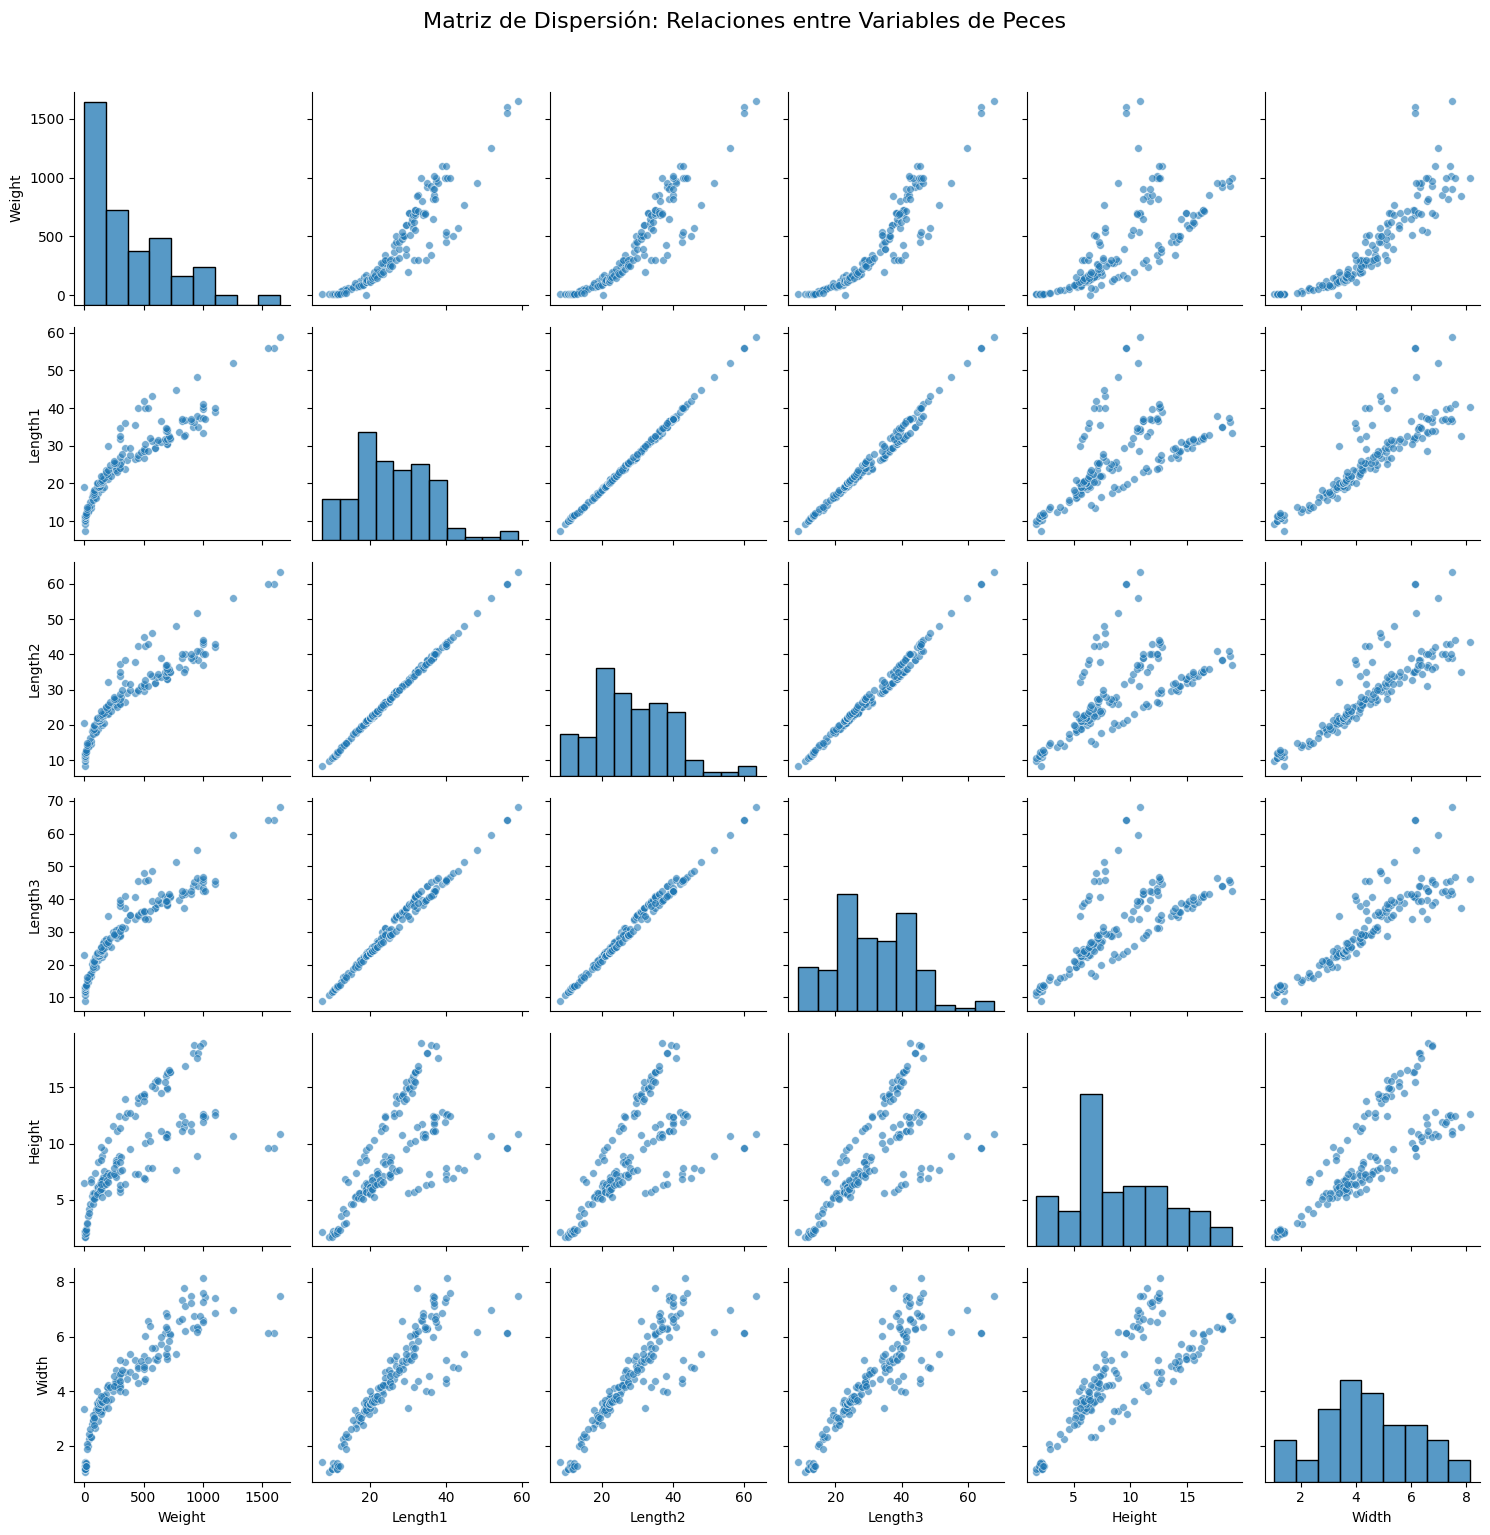

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionar solo las columnas numéricas
numeric_cols = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

# Crear matriz de dispersión con seaborn
plt.figure(figsize=(3, 3))
sns.pairplot(dataset[numeric_cols], 
             diag_kind='hist',     # Histogramas en la diagonal
             kind='scatter',       # Gráficos de dispersión
             plot_kws={'alpha': 0.6, 's': 30},  # Transparencia y tamaño
             corner=False)         # Mostrar toda la matriz

plt.suptitle('Matriz de Dispersión: Relaciones entre Variables de Peces', 
             y=1.02, fontsize=16)
plt.tight_layout()
plt.show()